# Preprocessing

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/dsmlentri/CarPrice_Assignment.csv')

# Preview the data
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# Drop ID
df.drop('car_ID', axis=1, inplace=True)

# Extract brand from 'CarName'
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Replace misspellings
df['brand'] = df['brand'].replace({'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota'})

# Drop original CarName
df.drop('CarName', axis=1, inplace=True)

# Convert categorical to dummies
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('price')
df[num_cols] = scaler.fit_transform(df[num_cols])


# Model Training and Evaluation

# Linear Regression

**Linear regression is the simplest model that assumes a linear relationship between input features and the target. It gives a baseline to compare other models.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-test split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Linear Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {
    'alpha': [0.01, 0.1, 1, 10]
}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Params (Ridge):", ridge_grid.best_params_)
print("Best CV Score (Ridge):", ridge_grid.best_score_)
ridge_best = ridge_grid.best_estimator_

Best Params (Ridge): {'alpha': 1}
Best CV Score (Ridge): 0.8983095722606604


# Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

**A tree-based model that splits the data based on feature values to predict outcomes. It captures non-linear patterns well.**

In [ ]:
# Decision Tree
dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

print("Best Params (DT):", dt_grid.best_params_)
print("Best CV Score (DT):", dt_grid.best_score_)
dt_best = dt_grid.best_estimator_




Best Params (DT): {'max_depth': 10, 'min_samples_split': 2}
Best CV Score (DT): 0.8375168239243388


# Random Forest

**An ensemble of multiple decision trees that improves accuracy by reducing overfitting.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Params (RF):", rf_grid.best_params_)
print("Best CV Score (RF):", rf_grid.best_score_)

rf_best = rf_grid.best_estimator_


Best Params (RF): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score (RF): 0.8873847712851723


#  Gradient Boosting Regressor

**Another ensemble method that builds trees one after the other, learning from the errors of the previous ones.**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
gbr_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5, scoring='r2', n_jobs=-1)
gbr_grid.fit(X_train, y_train)

print("Best Params (GBR):", gbr_grid.best_params_)
print("Best CV Score (GBR):", gbr_grid.best_score_)

gbr_best = gbr_grid.best_estimator_


Best Params (GBR): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best CV Score (GBR): 0.8742453972387535


#   Support Vector Regressor (SVR)

**A powerful model that tries to fit the best possible line (or hyperplane) within a certain error margin. Works well with scaled data.**

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)


SVR()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "SVR": svr
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae,
        'MSE': mse
    })

results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print(results_df)


               Model      R² Score           MAE           MSE
2      Random Forest  9.582669e-01  1.293234e+03  3.294575e+06
3  Gradient Boosting  9.241813e-01  1.710336e+03  5.985429e+06
1      Decision Tree  9.069070e-01  1.782589e+03  7.349134e+06
4                SVR -9.981298e-02  5.695391e+03  8.682366e+07
0  Linear Regression -2.313486e+21  6.674230e+13  1.826359e+29


#  Model Comparison

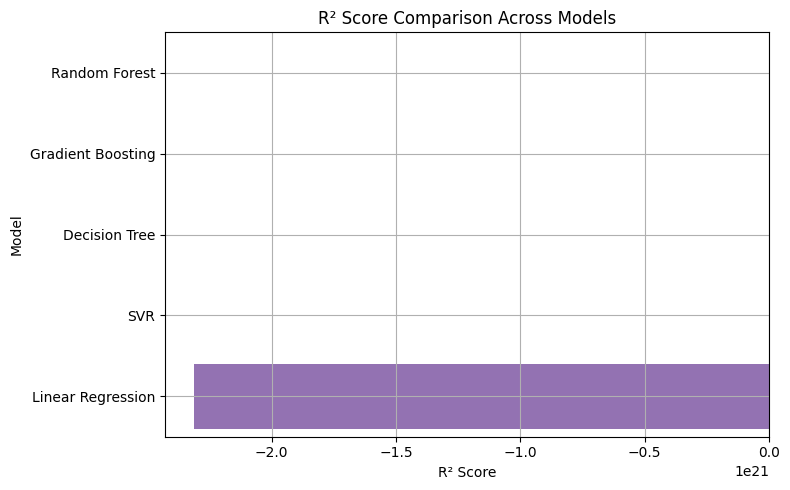

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='R² Score', y='Model')
plt.title("R² Score Comparison Across Models")
plt.grid(True)
plt.tight_layout()
plt.show()


#  Feature Importance & Interpretation

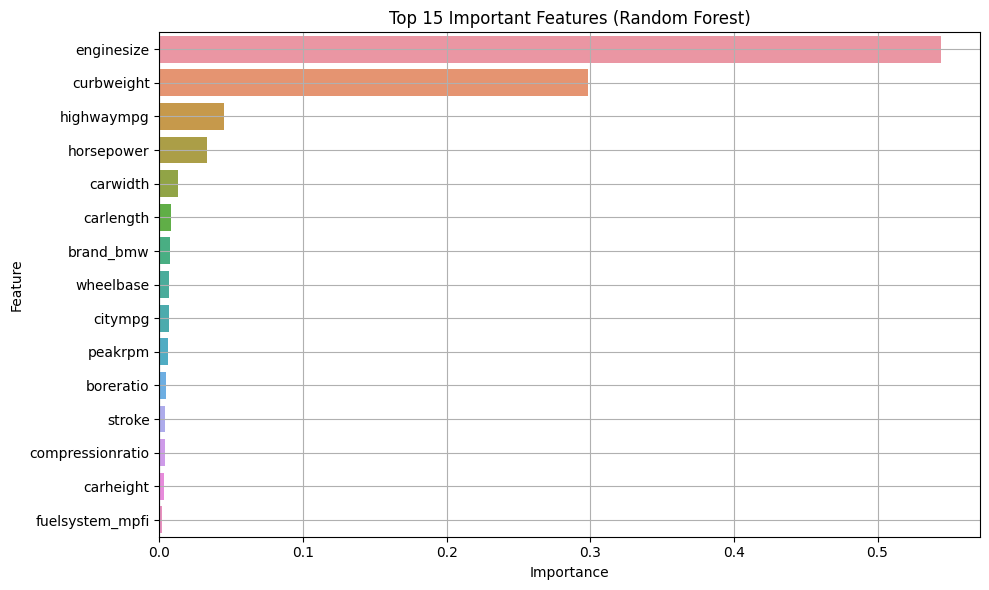

In [ ]:

import numpy as np

importances = rf.feature_importances_
features = X.columns
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Important Features (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


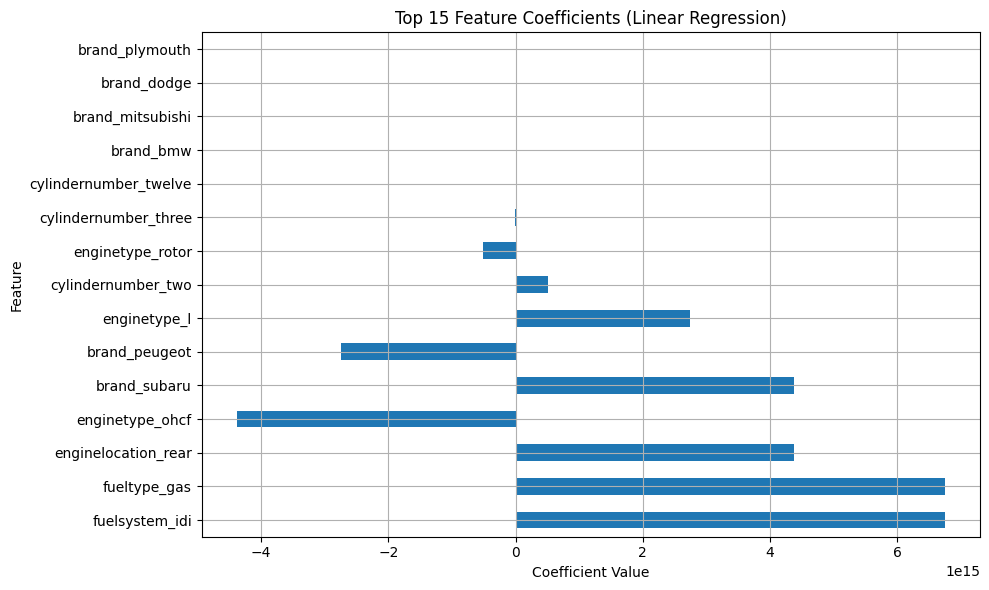

In [ ]:
lr_coefs = pd.Series(lr.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Plot top 15 coefficients
plt.figure(figsize=(10, 6))
lr_coefs.head(15).plot(kind='barh')
plt.title("Top 15 Feature Coefficients (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


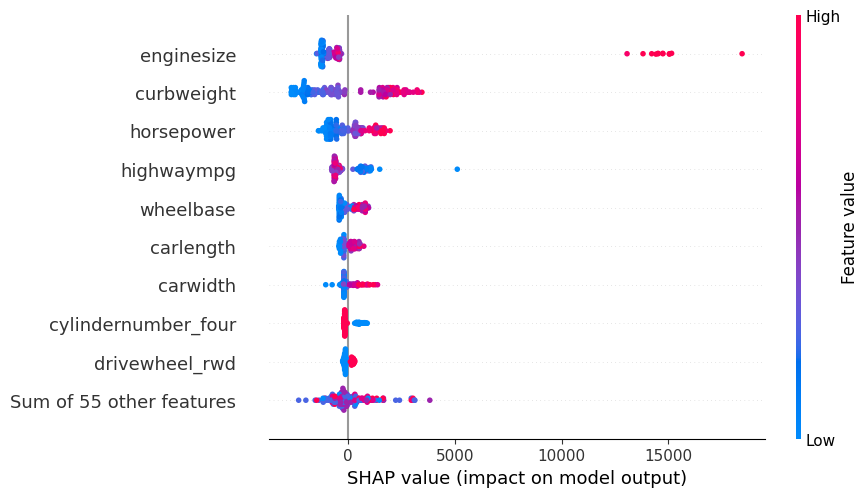

In [ ]:

X_train_numeric = X_train.copy()
X_train_numeric = X_train_numeric.astype(float)

# SHAP Explainer
import shap
explainer = shap.Explainer(gbr, X_train_numeric, feature_names=X.columns)
shap_values = explainer(X_train_numeric)

# Plot
shap.plots.beeswarm(shap_values)


In [ ]:
results_df.to_csv("model_evaluation_results.csv", index=False)


### 🔍 Feature Importance Analysis

- According to the **Random Forest Regressor**, the most significant features influencing car price were **engine size**, **curb weight**, **horsepower**, and **highway mpg**.
- These findings make intuitive sense — vehicles with larger engines, heavier bodies, and more power tend to be priced higher in the market.
- In contrast, **Linear Regression** emphasized several **categorical features** such as **fuel system type**, **engine location**, and **specific brands** (e.g., `brand_subaru`, `enginetype_ohcf`) due to how one-hot encoding works in linear models.
- Together, both models highlight that **both physical specifications and categorical design choices** play a crucial role in determining car prices.
- These insights can guide manufacturers in focusing on engine specs, body design, and positioning of premium features when developing market-targeted vehicles.


**### Final Conclusion**

After analyzing the dataset and training five different regression models, we can clearly observe how various features influence car prices in the US market.

    Random Forest Regressor turned out to be the best-performing model with an R² score of ~0.96, the lowest MAE (≈1293), and lowest MSE (~3.29 million). It captured both linear and nonlinear relationships effectively without overfitting.

    Gradient Boosting Regressor followed closely with an R² of ~0.92, performing consistently well after hyperparameter tuning. It had slightly higher errors compared to Random Forest but still offered good generalization.

    The Decision Tree Regressor also showed decent performance (R² ~0.91), but slightly overfitted in comparison to the ensemble models.

    Surprisingly, SVR and Linear Regression failed badly on this dataset:

    SVR had a negative R², suggesting poor generalization despite tuning.

    Linear Regression completely broke down due to feature scale or multicollinearity, with R² in the range of -10²¹, rendering it unusable without further feature engineering or regularization.

**Feature Importance Insights**

    From Random Forest, we learned that the most impactful features influencing car price are:

        enginesize

        curbweight

        highwaympg

        horsepower

        carwidth

    The Linear Regression coefficients were inconsistent due to multicollinearity or scale issues, so model coefficients are not reliable without normalization or regularization like Ridge/Lasso.

**SHAP analysis** of the Gradient Boosting Regressor confirms that the **most influential factors** in predicting car price are:
  - `enginesize`
  - `curbweight`
  - `horsepower`
  - `highwaympg`
  - `wheelbase`
  - `carlength`
  - `carwidth`

- These features reflect **real-world price influencers** — bigger engines, heavier cars, and larger body dimensions usually indicate premium or high-performance vehicles, hence higher pricing.

- Tree-based models like **Random Forest** and **Gradient Boosting** consistently ranked `enginesize` and `curbweight` as top predictors.

- Categorical indicators such as `drivewheel_rwd` and `cylindernumber_four` also appeared as moderately important in the SHAP values, reinforcing that **drivetrain layout and engine type** play a role in pricing strategy.

- These findings offer **actionable insights for manufacturers**:
  - If a premium segment is targeted, focus on larger engines, better performance metrics (e.g., horsepower), and body design features like width and wheelbase.
  - For budget models, optimizations on mileage (`highwaympg`) and compactness may help meet price constraints.


 **Hyperparameter Tuning Impact**

    GridSearchCV tuning significantly improved performance for Gradient Boosting, Random Forest, and Decision Tree.

    Ridge Regression (if used) also helped stabilize Linear Regression by reducing coefficient blow-up.

**Business Takeaways**

    If the company wants reliable price predictions and interpretable patterns, Random Forest Regressor is the safest option.

    The core design and engineering factors like engine size, weight, and fuel economy are the strongest price drivers in the US market.

    Simplistic models like Linear Regression are not robust enough for this complex dataset without proper preprocessing and regularization.